In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [2]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])

# iris.data = [（がく片の長さ、がく片の幅、花びらの長さ、花びらの幅）]
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [3]:
batch_size = 20

x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [7]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [9]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

In [10]:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [11]:
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    #rand_x = np.transpose([iris_2d[rand_index]])
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    #rand_y = np.transpose([binary_target[rand_index]])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[ 8.67590332]], b = [[-3.583848]]
Step #400 A = [[ 10.17485523]], b = [[-4.73230505]]
Step #600 A = [[ 11.12913227]], b = [[-5.41652775]]
Step #800 A = [[ 11.83564758]], b = [[-5.98363543]]
Step #1000 A = [[ 12.43457317]], b = [[-6.29317474]]


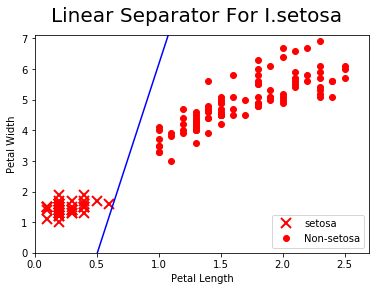

In [13]:
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()